In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
%matplotlib inline

# def pltDefaultPar():
#     #reset default matplotlib parameters for this notebook
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams['lines.linewidth'] = 1
#     plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 11})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootMAC


## D over p vary a

In [2]:
# Function to plot and fit D over p vary lub noLub data with fixed aop
def plotDopvarylub(dataArrs,labels,loglog=False):
    for i,data in enumerate(dataArrs):
        dd0s=data[:,1]/6.
        prels=data[:,0]
        if loglog==True:
            plt.loglog(prels,np.abs(np.log(dd0s)),'o-',label=labels[i])
            plt.xlabel("$\log(p/b)$")
            plt.ylabel("$\log\log(D/D_0)$")
        else:
            plt.plot(prels,dd0s,'o-',label=labels[i])
            plt.ylim([0,1.3])
            plt.xlim([0,1])
            plt.xlabel("$p/b$")
            plt.ylabel("$D/D_0$")
    #plt.legend()
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [3]:
# get polymer system data for different n with noLub
def getDop_a(a,n=1,u0=0,trigger='',system='',oldLub=False):
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger
    folder+="/dt0.001/t200/"+adir+"/d0/b"+str(b)
    #print(folder)
    for pdir in os.listdir(folder): 
        prel=float(pdir[1:])/10
        file=os.path.join(folder, pdir,'k1.000/u'+str(u0)+'/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

In [ ]:
a=0.5
u0=-1#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dataLub=getDop_a(a,u0=u0)
datanL=getDop_a(a,u0=u0,trigger='noLub/steric')
dataoldLub=getDop_a(a,u0=u0,oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
#plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)

Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv///dt0.001/t200/a1/d0/b10/p1.85185/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv///dt0.001/t200/a1/d0/b10/p1.88679/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt


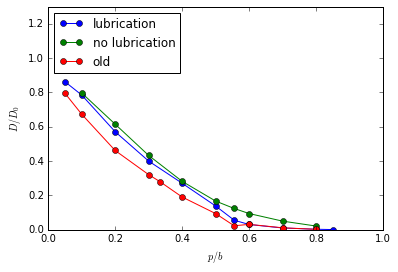

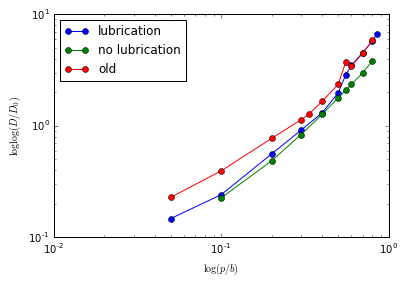

In [99]:
a=1
dataLub=getDop_a(a)
datanL=getDop_a(a,trigger='noLub/steric')
dataoldLub=getDop_a(a,oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

## D over p vary aop

In [6]:
# get polymer system data for different n with noLub
def getDop_aop(aop,n=1,trigger='',system='',oldLub=False):
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger+"/dt0.001/t200/"
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger+"/dt0.001/t200/"
    #print(folder)
    for adir in os.listdir(folder): 
        if "DS" in adir: continue
        a=float(adir[1:])
        p=a/aop
        pstr='%s' % float('%g' % p)
        pstr=pstr.rstrip('0').rstrip(".")
        pdir='p'+pstr
        arel=(float(a)/10.)                 # make p value p/b
        prel=p/10.
        file=os.path.join(folder,adir,'d0/b'+str(b),pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

## Get normal data for aop=0.5,1,2
# TODO:
- for the figure below, get the lubcutint=9 data for the newlub data (blue line), here I left out p=a=0.05b, since I would need to use a smaller timestep for that. Also, I forgot that I NEED TO INCLUDE STERIC interactions, otherwise it won"t be rods but adjacent spheres governing the steric interactions!!!!!!!!!
/Users/jh/Documents/Remote_PC/yoshi_scratch/HI/sim/Release/sim_data/newlub/noreset/fitRPinv/steric/dt0.001/t200
- ALSO INCLUDE STERIC: If larger lubcutint leads to better data for aop=1 --> re-record data for aop=2 and aop=0.5, too with larger lubcutint

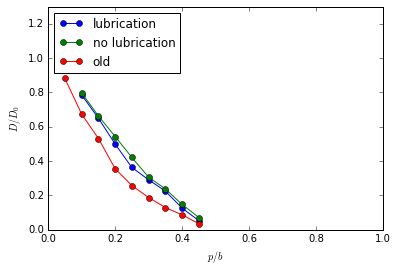

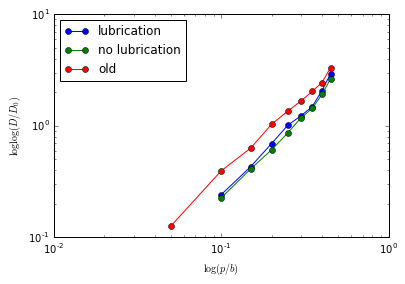

In [9]:
aop=1
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

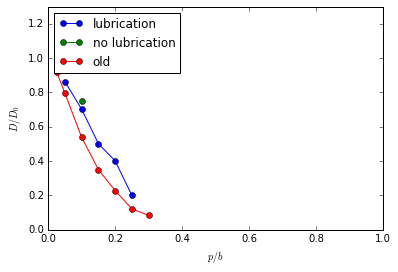

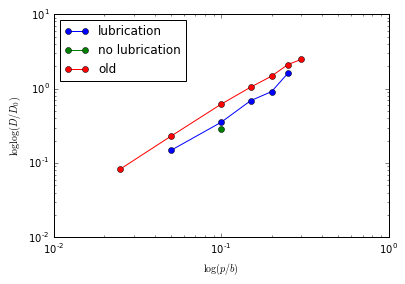

In [7]:
aop=2
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

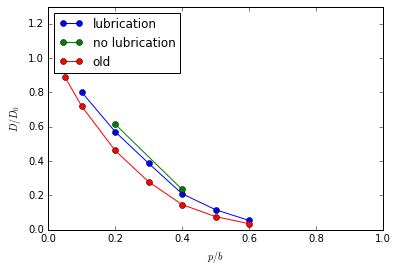

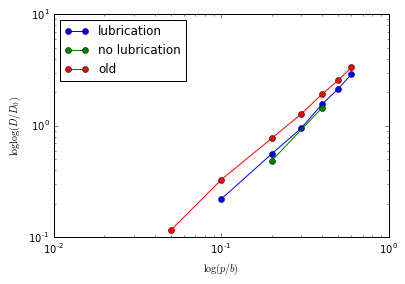

In [8]:
aop=0.5
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

### Single Monomer Systems

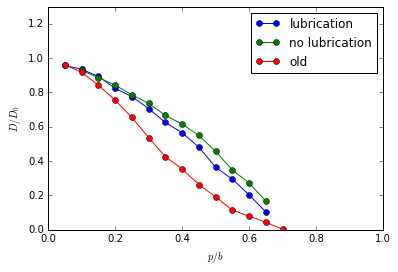

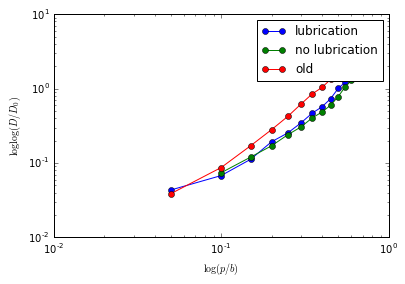

In [94]:
# Get SS W=3 data
aop=1
W=3
dataSSW3nL=getDop_aop(aop,W,trigger='noLub/steric',system='test/EwaldTest1')
dataSSW3Lub=getDop_aop(aop,W,trigger='',system='test/EwaldTest1')
dataSSW3oldLub=getDop_aop(aop,W,trigger='',system='test/EwaldTest1',oldLub=True)
dataSSW3=[dataSSW3Lub]+[(dataSSW3nL)]+[dataSSW3oldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(dataSSW3,labels)
plotDopvarylub(dataSSW3,labels,loglog=True)

### Conclusion:
I find that it's important that lubcutint is large enough. I should use a value of 9. Alternatively, I should use a value that does not depend so much on the diameters $a$ and $p$. Otherwise, the lines will not be smooth for D over p data

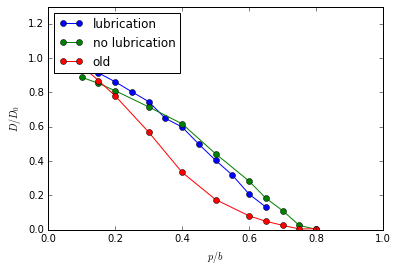

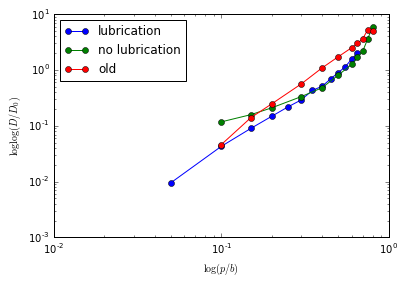

In [103]:
# Get ranS W=4 data
aop=1
W=4
dataranSW4nL=getDop_aop(aop,W,trigger='noLub/steric',system='ranSpheres/test/EwaldTest1')
dataranSW4Lub=getDop_aop(aop,W,trigger='',system='ranSpheres/test/EwaldTest1')
dataranSW4oldLub=getDop_aop(aop,W,trigger='',system='ranSpheres/test/EwaldTest1',oldLub=True)
dataranSW4=[dataranSW4Lub]+[(dataranSW4nL)]+[dataranSW4oldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(dataranSW4,labels)
plotDopvarylub(dataranSW4,labels,loglog=True)

### Conclusion:
It appears that the lubrication effect is very much reduced here and we do not really see a clear stretched exp anymore. This *might* be partly due to using a shorter lubrication cutoff. Hence, I am re-running the SSW3 simulation on yoshi with lubcutint=9.
- TODO SS lubcutint=9 this must be evaluated on yoshi - YES, It improves it (For SS we see lubcutint=9 data)

## CONCLUSION FOR ALL SINGLE MONOMER SYSTEMS
- Leave out the noLub plot for SS and plot the lubcutint=9 data for SS together with the lub and nolub data for ranS. This will show, that SS and ranSnoLub do not lead to a stretched exp, but ranS with lub does so. Hence, both lub AND the structure are important!